# Using Supervised Learning for Object Recognition

The dataset for this project contains features extracted from the silhouette of vehicles in different angles. Four “Corgie” model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The objective of the project is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles

The following tasks will be completed during the project
1. Data exploration and cleaning
2. feature selection
3. Data preprocessing and train test split
4. Model training
5. Model evaluation


## Data exploration and cleaning

In [1]:
# Importing important python libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

In [2]:
# Reading the dataset

data = pd.read_csv('vehicle-1.csv')
data

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

Observing the above data summary certain columns such as scaled_variance of the car's silhouette varies a lot from the other variables because the dimensions of one type of vehicle eg a bus and a car are different. This will be taken into consideration during pre-processing before model development. Checking the data for missing values is done below for each variable.

In [5]:
data.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Given the size of the data the best way to deal witht the missing values are by imputation preferably by the column mean values or the median depending on the distribution of the column data.

In [6]:
data.hist(bins=60, figsize=(16,20), layout=(6,3));

In [7]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

skewness_about.2, hollows_ratio, scaled_radius_of_gyration, max.length_rectangularity, compactness, circularity, distance_circularity, radius_ratio are the data columns that are approximately normally distributed and their missing values can be replaced with their columns' mean values. The others have skewed distributions. Imputation will be done below and the relationships between the variables will be determined afterwards to determine what features to keep in the dataset. 

In [8]:
values = {
    'skewness_about.2': data['skewness_about.2'].mean(), 
    'hollows_ratio': data['hollows_ratio'].mean(), 
    'scaled_radius_of_gyration': data['scaled_radius_of_gyration'].mean(), 
    'circularity': data['circularity'].mean(), 
    'distance_circularity': data['distance_circularity'].mean(), 
    'radius_ratio': data['radius_ratio'].mean() 
}

values

{'skewness_about.2': 188.91952662721894,
 'hollows_ratio': 195.63238770685578,
 'scaled_radius_of_gyration': 174.70971563981044,
 'circularity': 44.828775267538646,
 'distance_circularity': 82.1104513064133,
 'radius_ratio': 168.88809523809525}

In [9]:
# Data rows with the nan values

data[data.isna().any(axis=1)].head()

compactness  circularity  distance_circularity  radius_ratio  \
5           107          NaN                 106.0         172.0   
9            93         44.0                  98.0           NaN   
19          101         56.0                 100.0         215.0   
35          100         46.0                   NaN         172.0   
66           81         43.0                  68.0         125.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                   50.0                        6          255.0   
9                   62.0                       11          183.0   
19                   NaN                       10          208.0   
35                  67.0                        9          157.0   
66                  57.0                        8          149.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5            26.0                    28.0                        169   
9            36.0                    22.0                        146   
19           32.0                    24.0                        169   
35           43.0                    20.0                        150   
66           46.0                    19.0                        146   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5             280.0              957.0                      264.0   
9             202.0              505.0                      152.0   
19            227.0              651.0                      223.0   
35            170.0              363.0                      184.0   
66            169.0              323.0                      172.0   

    scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                          85.0             5.0               9.0   
9                          64.0             4.0              14.0   
19                         74.0             6.0               5.0   
35                         67.0            17.0               7.0   
66                          NaN             NaN              18.0   

    skewness_about.2  hollows_ratio class  
5              181.0            183   bus  
9              195.0            204   car  
19             186.0            193   car  
35             192.0            200   van  
66             179.0            184   bus

In [10]:
# Replacing the nan values with the mean values

data = data.fillna(value=values)
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0    178.000000   
1           91    41.000000                  84.0    141.000000   
2          104    50.000000                 106.0    209.000000   
3           93    41.000000                  82.0    159.000000   
4           85    44.000000                  70.0    205.000000   
5          107    44.828775                 106.0    172.000000   
6           97    43.000000                  73.0    173.000000   
7           90    43.000000                  66.0    157.000000   
8           86    34.000000                  62.0    140.000000   
9           93    44.000000                  98.0    168.888095   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [11]:
values_1 = {
    'pr.axis_aspect_ratio': data['pr.axis_aspect_ratio'].median(), 
    'scatter_ratio': data['scatter_ratio'].median(), 
    'elongatedness': data['elongatedness'].median(), 
    'pr.axis_rectangularity': data['pr.axis_rectangularity'].median(), 
    'scaled_variance': data['scaled_variance'].median(), 
    'scaled_variance.1': data['scaled_variance.1'].median(),
    'scaled_radius_of_gyration.1': data['scaled_radius_of_gyration.1'].median(),
    'skewness_about': data['skewness_about'].median(),
    'skewness_about.1': data['skewness_about.1'].median(),
            
}

values_1

{'pr.axis_aspect_ratio': 61.0,
 'scatter_ratio': 157.0,
 'elongatedness': 43.0,
 'pr.axis_rectangularity': 20.0,
 'scaled_variance': 179.0,
 'scaled_variance.1': 363.5,
 'scaled_radius_of_gyration.1': 71.5,
 'skewness_about': 6.0,
 'skewness_about.1': 11.0}

In [12]:
data = data.fillna(value=values_1)
data.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95    48.000000                  83.0    178.000000   
1           91    41.000000                  84.0    141.000000   
2          104    50.000000                 106.0    209.000000   
3           93    41.000000                  82.0    159.000000   
4           85    44.000000                  70.0    205.000000   
5          107    44.828775                 106.0    172.000000   
6           97    43.000000                  73.0    173.000000   
7           90    43.000000                  66.0    157.000000   
8           86    34.000000                  62.0    140.000000   
9           93    44.000000                  98.0    168.888095   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [13]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


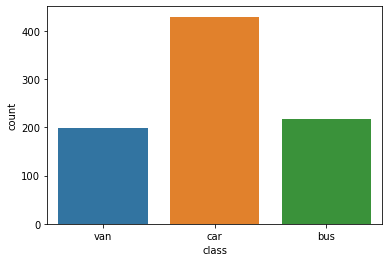

In [14]:
sns.countplot(data['class'], );

The distribution of records for the vehicle classes are good enough to get reliable predictions. Uneven data and bias in our model would not be a problem. The dataset inherently has more cars than busses or vans. The class columns needs to be converted to a categorical variable. 

In [15]:
data['class'] = data['class'].astype('category')
data.replace({'car':1, 'bus':2, 'van':3}, inplace=True)
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      3  
1             189.0            199      3  
2             188.0            196      1  
3             199.0            207      3  
4             180.0            183      2

## Feature selection

A corelation plot will be used below to explore the relationship between the variables to determine with features could be dropped and which ones should be kept. A PCA can be used for this purpose as well and it will be explored later on. Since the goal of the project is to classify vehicles into the three groups the original columns can be replaced with their eigenvectors without bothering about the meaning of the data columns.

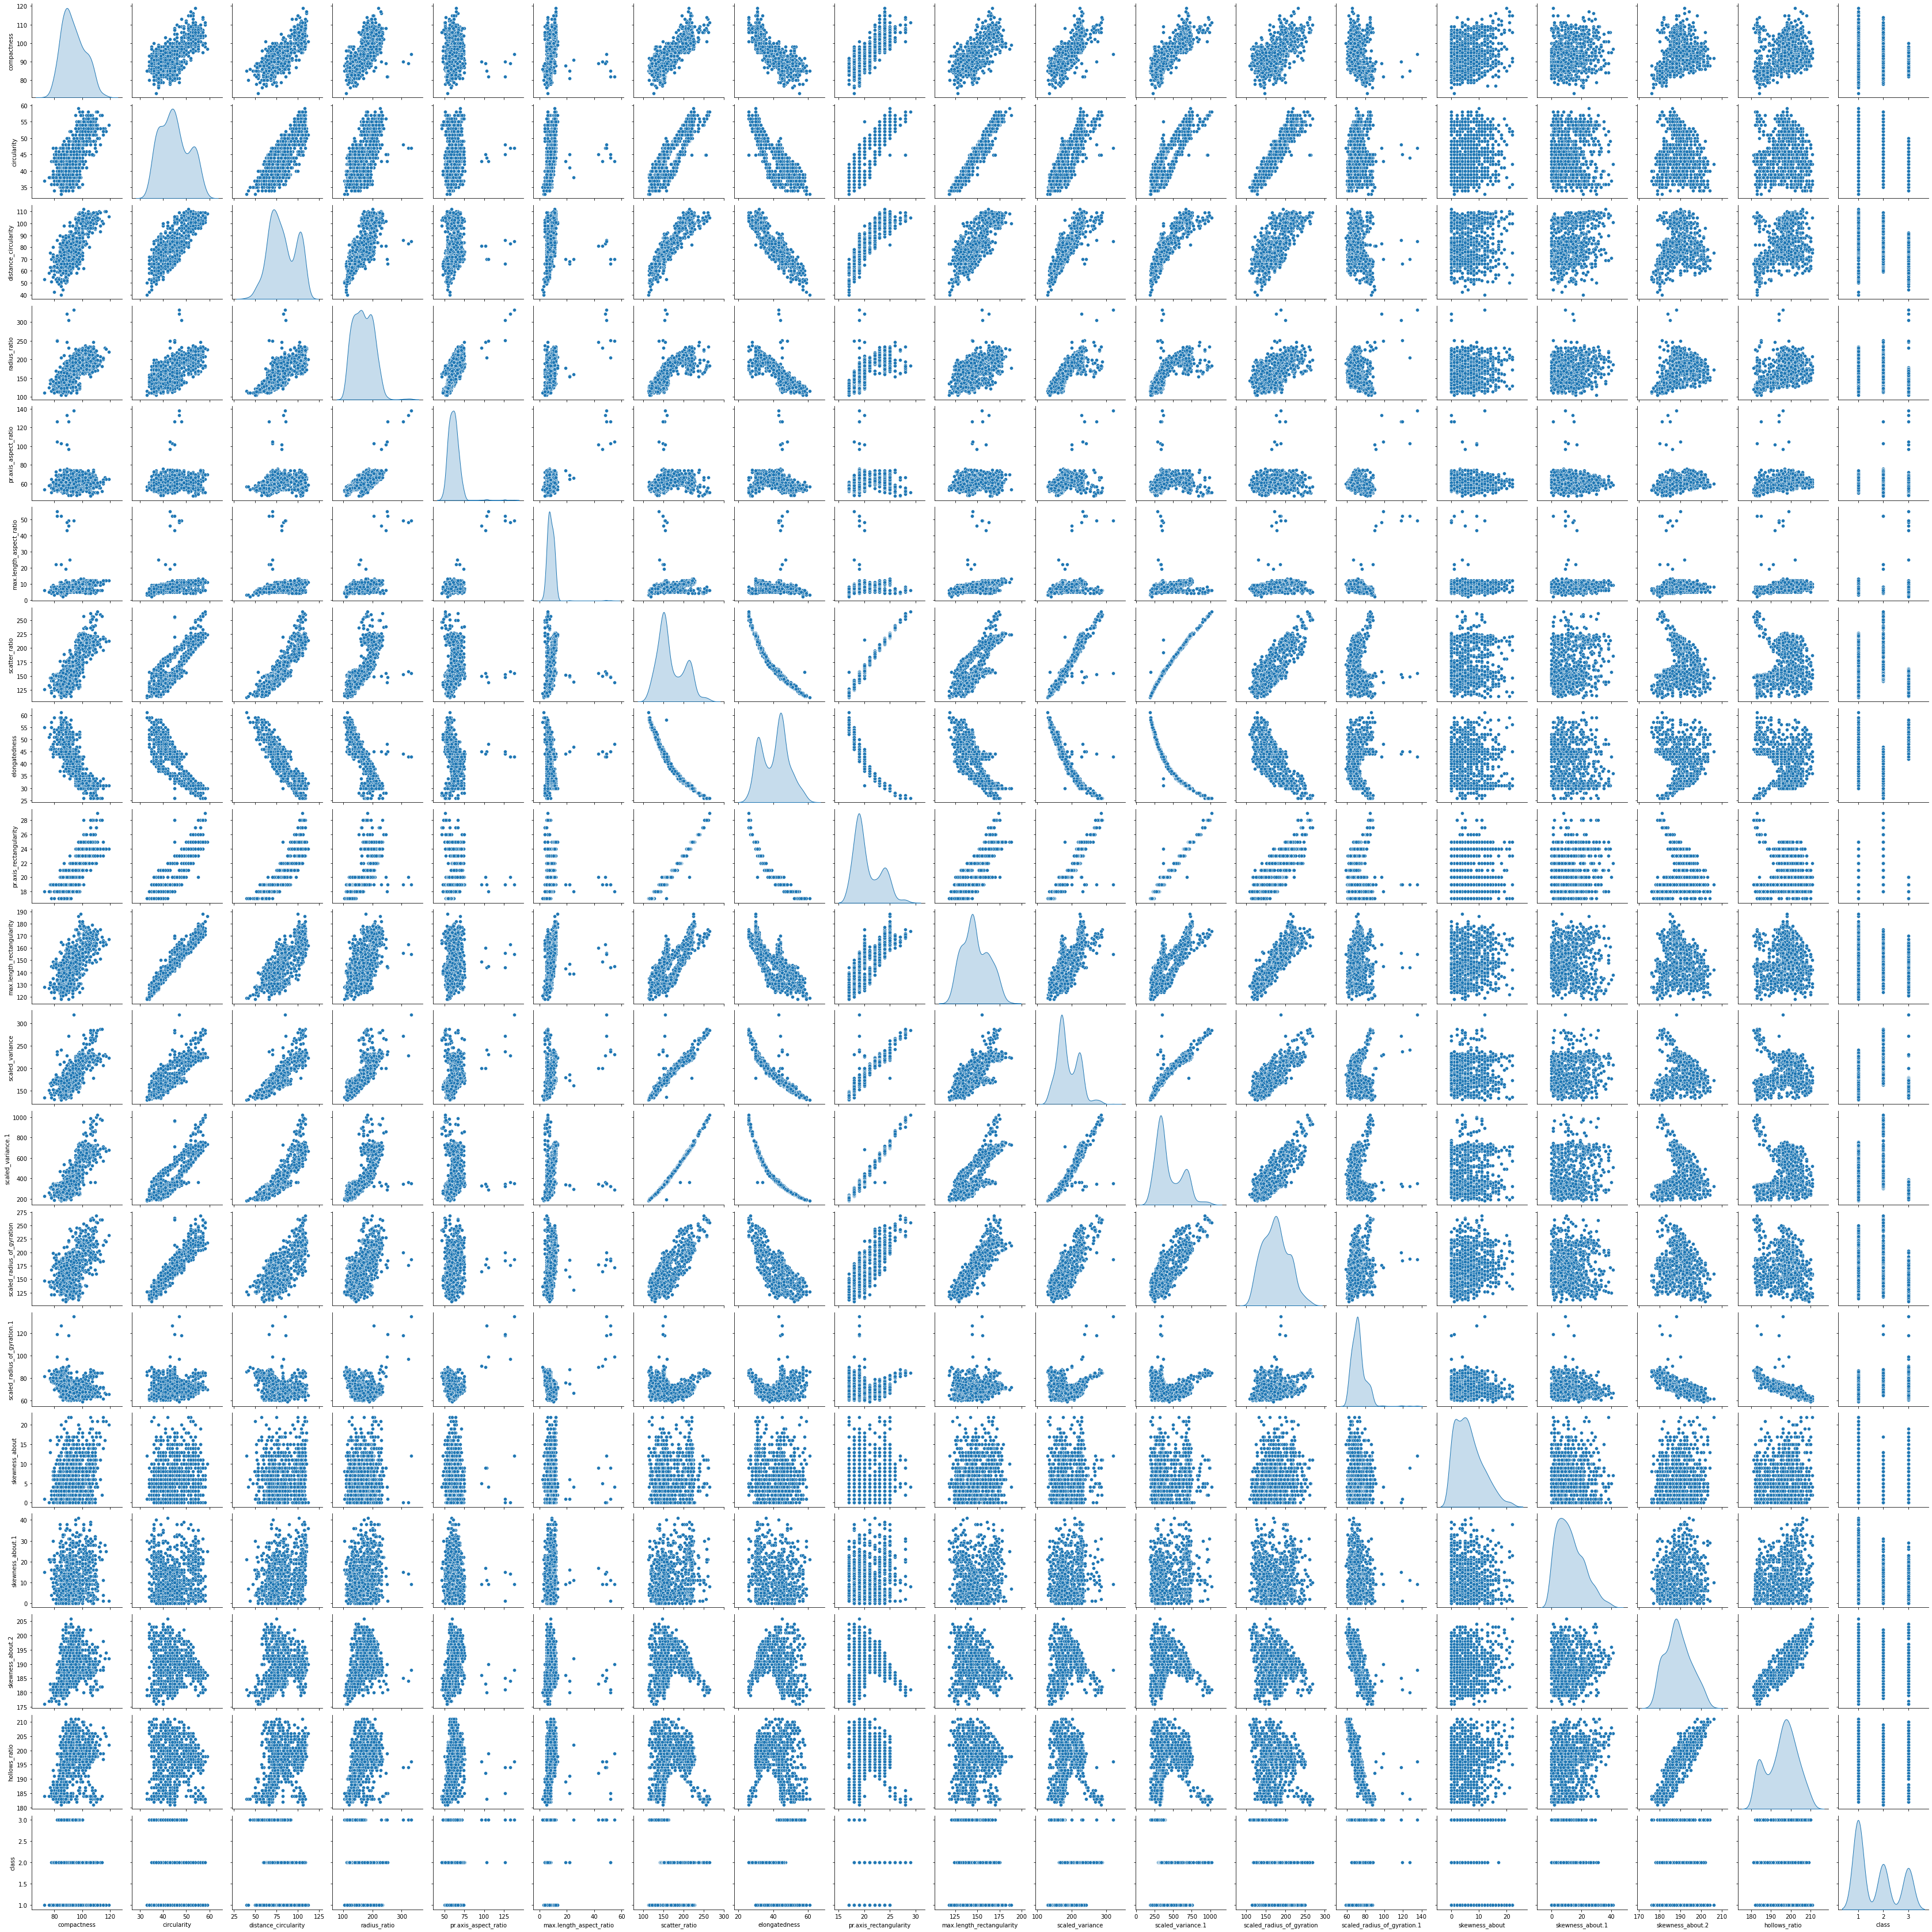

In [16]:
sns.pairplot(data=data,kind='scatter',diag_kind='kde')

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

The columns that can be removed because they have a high correlation with one or other columns are elongatedness, circularity, pr_axis_rectangularity, scatter_ratio, scaled_variance_1, distance_circularity, scaled_variance, scaled_radius_of_gyration, skewness_about.2 and hollows_ratio. They all have correlation coefficents of above 0.7 with other variables

In [18]:
data_1 = data.drop(['elongatedness','circularity', 'pr.axis_rectangularity', 
                    'scatter_ratio', 'scaled_variance.1',
                   'distance_circularity', 'scaled_variance', 
                    'scaled_radius_of_gyration', 'skewness_about.2', 'hollows_ratio'], axis=1)
data_1.corr()

compactness  radius_ratio  pr.axis_aspect_ratio  \
compactness                     1.000000      0.689840              0.091534   
radius_ratio                    0.689840      1.000000              0.663327   
pr.axis_aspect_ratio            0.091534      0.663327              1.000000   
max.length_aspect_ratio         0.148249      0.450036              0.648724   
max.length_rectangularity       0.676143      0.569205              0.126909   
scaled_radius_of_gyration.1    -0.249593     -0.180396              0.152950   
skewness_about                  0.236078      0.048956             -0.058371   
skewness_about.1                0.157015      0.173618             -0.031976   
class                          -0.297774     -0.402130              0.038686   

                             max.length_aspect_ratio  \
compactness                                 0.148249   
radius_ratio                                0.450036   
pr.axis_aspect_ratio                        0.648724   
max.length_aspect_ratio                     1.000000   
max.length_rectangularity                   0.305943   
scaled_radius_of_gyration.1                 0.295735   
skewness_about                              0.015599   
skewness_about.1                            0.043422   
class                                       0.036942   

                             max.length_rectangularity  \
compactness                                   0.676143   
radius_ratio                                  0.569205   
pr.axis_aspect_ratio                          0.126909   
max.length_aspect_ratio                       0.305943   
max.length_rectangularity                     1.000000   
scaled_radius_of_gyration.1                   0.041622   
skewness_about                                0.135852   
skewness_about.1                              0.001366   
class                                        -0.140152   

                             scaled_radius_of_gyration.1  skewness_about  \
compactness                                    -0.249593        0.236078   
radius_ratio                                   -0.180396        0.048956   
pr.axis_aspect_ratio                            0.152950       -0.058371   
max.length_aspect_ratio                         0.295735        0.015599   
max.length_rectangularity                       0.041622        0.135852   
scaled_radius_of_gyration.1                     1.000000       -0.088355   
skewness_about                                 -0.088355        1.000000   
skewness_about.1                               -0.126183       -0.034990   
class                                           0.221288       -0.092882   

                             skewness_about.1     class  
compactness                          0.157015 -0.297774  
radius_ratio                         0.173618 -0.402130  
pr.axis_aspect_ratio                -0.031976  0.038686  
max.length_aspect_ratio              0.043422  0.036942  
max.length_rectangularity            0.001366 -0.140152  
scaled_radius_of_gyration.1         -0.126183  0.221288  
skewness_about                      -0.034990 -0.092882  
skewness_about.1                     1.000000 -0.271465  
class                               -0.271465  1.000000

The data is prepared for labeling, splitting and scaling before data modeling

## Splitting and scaling the dataset

The dataset will be split into 70 percent for training and 30 percent for testing. Afterwards the data will be scaled to be between 0 and 1 to make the data have the same scale. 

In [19]:
# Labeling the data columns

Y = data_1['class']
X = data_1.drop(labels='class', axis=1)
X

compactness  radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  \
0             95         178.0                  72.0                       10   
1             91         141.0                  57.0                        9   
2            104         209.0                  66.0                       10   
3             93         159.0                  63.0                        9   
4             85         205.0                 103.0                       52   
..           ...           ...                   ...                      ...   
841           93         183.0                  64.0                        8   
842           89         163.0                  66.0                       11   
843          106         222.0                  67.0                       12   
844           86         146.0                  58.0                        7   
845           85         123.0                  55.0                        5   

     max.length_rectangularity  scaled_radius_of_gyration.1  skewness_about  \
0                          159                         70.0             6.0   
1                          143                         72.0             9.0   
2                          158                         73.0            14.0   
3                          143                         63.0             6.0   
4                          144                        127.0             9.0   
..                         ...                          ...             ...   
841                        134                         72.0             7.0   
842                        159                         72.0             1.0   
843                        173                         70.0             3.0   
844                        124                         66.0             0.0   
845                        128                         73.0             1.0   

     skewness_about.1  
0                16.0  
1                14.0  
2                 9.0  
3                10.0  
4                11.0  
..                ...  
841              25.0  
842              20.0  
843               4.0  
844              25.0  
845              18.0  

[846 rows x 8 columns]

In [20]:
# Splitting into testing and training data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [21]:
x_train

compactness  radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  \
350           97         210.0                  66.0                        8   
40            95         214.0                  67.0                        9   
89            80         116.0                  55.0                        6   
427           86         176.0                  59.0                        9   
353           81         146.0                  64.0                        6   
..           ...           ...                   ...                      ...   
715          100         225.0                  68.0                       10   
767           88         166.0                  66.0                        7   
72            92         191.0                  62.0                        8   
235           90         134.0                  56.0                       11   
37            90         306.0                 126.0                       49   

     max.length_rectangularity  scaled_radius_of_gyration.1  skewness_about  \
350                        151                         66.0             1.0   
40                         151                         74.0             5.0   
89                         125                         81.0             8.0   
427                        132                         67.0             7.0   
353                        147                         75.0             5.0   
..                         ...                          ...             ...   
715                        165                         73.0             7.0   
767                        134                         69.0             5.0   
72                         137                         67.0             3.0   
235                        167                         76.0             1.0   
37                         156                        118.0             0.0   

     skewness_about.1  
350              32.0  
40                9.0  
89                5.0  
427              33.0  
353               0.0  
..                ...  
715              28.0  
767              13.0  
72               23.0  
235              14.0  
37               15.0  

[592 rows x 8 columns]

In [22]:
# Scaling the predictor variables

scaler = StandardScaler()
scaler_fit = scaler.fit(x_train)

In [23]:
x_train_transform = scaler_fit.transform(x_train)
x_test_transform = scaler_fit.transform(x_test)

In [24]:
x_train_transform

array([[ 0.39383924,  1.24828572,  0.63797276, ..., -0.8564127 ,
        -1.07946646,  2.12530602],
       [ 0.14841521,  1.3699021 ,  0.78141366, ...,  0.23025054,
        -0.2305204 , -0.39236988],
       [-1.69226502, -1.60969924, -0.93987708, ...,  1.18108087,
         0.40618914, -0.83022656],
       ...,
       [-0.21972084,  0.67060791,  0.06420918, ..., -0.72057979,
        -0.65499343,  1.14012849],
       [-0.46514487, -1.06242552, -0.79643618, ...,  0.50191635,
        -1.07946646,  0.15495097],
       [-0.46514487,  4.16707887,  9.24442643, ...,  6.20689834,
        -1.29170297,  0.26441514]])

## Model building

A support vector machine model will be used to classify the data. A grid search will be used to find the best parameters to use for the model and the original data will be fit to the model after transforming it using PCA. 

In [25]:
svm_model = SVC()

In [26]:
# Performing a grid search

# parameters = {
#     'C':[1.0, 2.0, 3.0],
#     'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree':[2, 3],
#     'gamma':['scale','auto'],
#     'tol':[0.001],
#     'cache_size':[200, 300],
#     'decision_function_shape':['ovo', 'ovr']
# }

# gs = GridSearchCV(estimator=svm_model, param_grid=parameters, cv=5)
# gs.fit(x_train, y_train)

In [27]:
# gs.best_params_

In [28]:
# Fitting the model with the best parameters from the grid search

model = SVC(
 
 C = 1.0,
 cache_size = 200,
 decision_function_shape = 'ovo',
 degree = 3,
 gamma = 'auto',
 kernel = 'poly',
 tol = 0.001
    
)

In [29]:
model_fit = model.fit(x_train_transform, y_train)

Now the original dataset will be transformed using PCA and it will be used for a model fit to compare its performance

In [30]:
pca = PCA(n_components=8)

In [31]:
X = data[data.columns[:-1]]
Y = data['class']
pca_fit = pca.fit_transform(X)

In [32]:
pca_fit.shape

(846, 8)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(pca_fit, Y, train_size=0.70, random_state=1)
scaler_fit_ = scaler.fit(X_train)
X_train_trans = scaler_fit_.transform(X_train)
X_test_trans = scaler_fit_.transform(X_test)

In [34]:
pca_svm_fit = model.fit(X_train_trans, Y_train)

## Model evaluation

The performance of the PCA fitted data and the other dataset from feature selection will be done using accurracy scores and K-Fold cross validation.

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
pred = model_fit.predict(x_test_transform)
pred_pca = pca_svm_fit.predict(X_test_trans)

In [44]:
print('The prediction accuracy for the features selected data:',round(accuracy_score(y_test, pred),2))
print('The prediction accuracy for the pca transformed data:',round(accuracy_score(Y_test, pred_pca),2))

The prediction accuracy for the features selected data: 0.43
The prediction accuracy for the pca transformed data: 0.88


In [45]:
from sklearn.model_selection import cross_validate

In [47]:
# Comparing cross validation scores

cross_val = cross_validate(estimator=model, X=x_test_transform, y=y_test, cv=5)
cross_val_pca = cross_validate(estimator=model, X=X_test_trans, y=Y_test, cv=5)

In [50]:
cross_val.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [51]:
cross_val['test_score']

array([0.64705882, 0.66666667, 0.62745098, 0.68627451, 0.68      ])

In [52]:
cross_val_pca['test_score']

array([0.7254902 , 0.84313725, 0.74509804, 0.76470588, 0.72      ])

In [54]:
print('The average cross validation score for the features selected data:',round(cross_val['test_score'].mean(),2))
print('The average cross validation score for the pca transformed data:',round(cross_val_pca['test_score'].mean(),2))

The average cross validation score for the features selected data: 0.66
The average cross validation score for the pca transformed data: 0.76


## Conclusion

The PCA transformation of the data as a method of dimension reduction produced better evaluation results compared to selecting the features using their correlation coefficents. An accurracy score of 88% is good compared to 43% without transforming the data using PCA. SVC is one of the best classiciation algortihms due to the fact that it creates kernel and a classification boundary that maximizes the classes of the data. Other classifiers can be tried on the data as well to see how they perform compared to SVC classifier.    